In [153]:
import numpy as np
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
import copy

In [2]:
def read_json(path):
    with open(path, encoding='utf-8') as f:
        iter_f = iter(f)
        line = f.readline()
        text = []
        for line in iter_f: 
            d = json.loads(line)
            text.append(d)
        f.close()
    return(text)

In [3]:
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        return json.dump(data, f, indent=2)

In [4]:
raw_business=read_json("Stat628/business.json")
raw_review=read_json("Stat628/review.json")
raw_tip=read_json("Stat628/tip.json")
raw_user=read_json("Stat628/user.json")

In [ ]:
frame_business=pd.DataFrame(raw_business)
frame_review=pd.DataFrame(raw_review)
frame_tip=pd.DataFrame(raw_tip)
frame_user=pd.DataFrame(raw_user)

In [5]:
seafood_business=[]
index=[]
for i in range(len(raw_business)):
    if raw_business[i]['categories'] is None:
        continue
    if "Seafood" in raw_business[i]['categories'] and "Restaurants" in  raw_business[i]['categories']:
        seafood_business.append(raw_business[i])
        index.append(i)

In [133]:
business_id=[]
for i in range(len(seafood_business)):
    business_id.append(seafood_business[i]['business_id'])

In [135]:
seafood_review={}
for i in range(len(seafood_business)):
    seafood_review[seafood_business[i]['business_id']]=[]

In [136]:
for i in range(len(raw_review)):
    if raw_review[i]['business_id'] in business_id:
        seafood_review[raw_review[i]['business_id']].append(raw_review[i])

In [48]:
#put reviews together
all_review=[]
for i in range(len(seafood_business)):
    all_review.extend(seafood_review[seafood_business[i]['business_id']])

In [125]:
write_json('data/all_review.json',all_review)

In [87]:
all_review[300]

{'review_id': 'IwBsa2BDyVU_slbaFqGeNw',
 'user_id': 'zh3C0Nner3tyJ98NXAiSsw',
 'business_id': 'nsNONDHbV7Vudqh21uicqw',
 'stars': 2.0,
 'useful': 1,
 'funny': 0,
 'cool': 0,
 'text': "Happy hour is great if that is just what you are going for. Otherwise, dinner is very hit or miss. Sides are always cold and you don't have many options. You would think if you only have four options they would be excellent for what you are paying. From steak to lobster it's just meh...Service is just mediocre, very snooty. It's a cute place but don't waste your time or especially your money if you want a great seafood dinner. We have been here 4+ times hoping for a change but nothing. Mediocre is the consistency here.",
 'date': '2016-07-28 05:44:21'}

In [98]:
#words list
word_food=['hot','fresh','oyster','live','raw','mixed','cold','alaskan','succulent',
           'seasonal','salmon','crab','shrimp','catfish','juicy','fatty','spicy','fried','zesty']
word_price=['expensive','pricey','cheap','affordable','luxury']
word_service=['friendly','satisfied','humble','service']
word_environment=['comfortable','clean','ambiance','environment','atmosphere','family','noisy','kids']
word_positive=['good','great','comparable','ample','efficient','huge','nice','tasty',
               'enjoyable','fancy','comfortable','enjoy','decent','beautiful',
               'excellent','delectable','fabulous','plentiful']
word_negative=['horrible','disgusting','disappoint','mediocre','bad','pricey','poor',
              'worst','awful']

In [44]:
# check rating vs review_num
rating={}
for i in range(len(seafood_business)):
    if seafood_business[i]['stars'] not in rating.keys():
        rating[seafood_business[i]['stars']]=1
    else:
        rating[seafood_business[i]['stars']]+=1

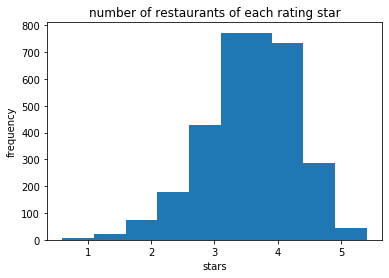

In [55]:
# plot of rating 
plt.bar(rating.keys(),rating.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title("number of restaurants of each rating star")
None

In [51]:
#check reviews and star
review_star={}
for i in range(len(all_review)):
    if all_review[i]['stars'] not in review_star.keys():
        review_star[all_review[i]['stars']]=1
    else:
        review_star[all_review[i]['stars']]+=1

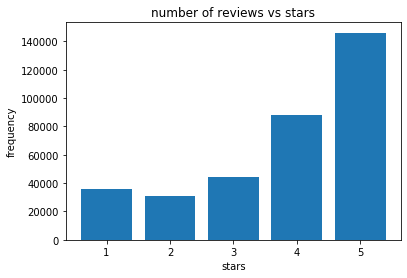

In [54]:
#plot star vs review_num
plt.bar(review_star.keys(),review_star.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title("number of reviews vs stars")
None

In [71]:
# review_star
review_star={}
for item in all_review:
    if item['stars'] not in review_star.keys():
        review_star[item['stars']]=[]
        review_star[item['stars']].append(item)
    else:
        review_star[item['stars']].append(item)

In [109]:
# plot word occurrence vs review
def plot_word(word):
    word_star={}
    for i in range(1,6):
        occurence=0
        for review in review_star[i]:
            if word in review['text'].lower():
                occurence+=1
        word_star[i]=occurence/len(review_star[i])
    plt.bar(word_star.keys(),word_star.values())
    plt.xlabel("stars")
    plt.ylabel("frequency")
    plt.title(word)
    plt.savefig('image/'+word+'.png')
    plt.show()

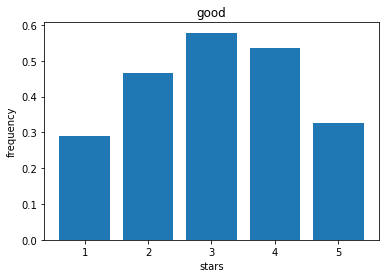

In [110]:
plot_word('good',all_review)

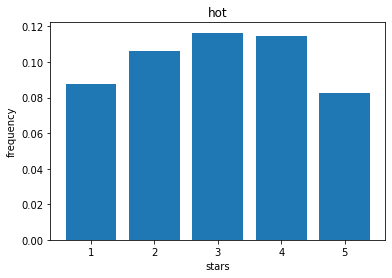

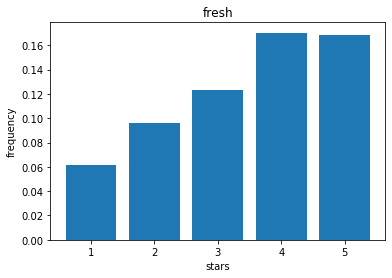

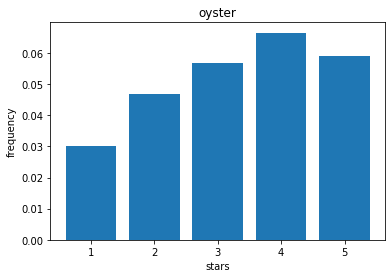

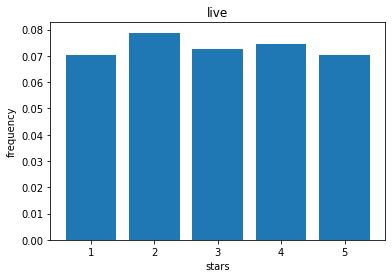

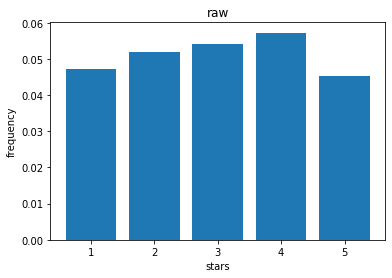

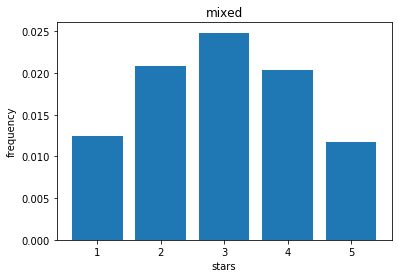

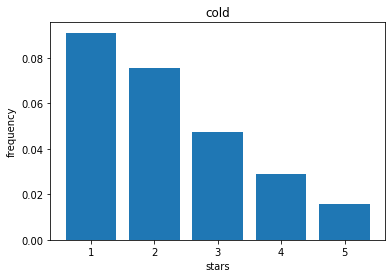

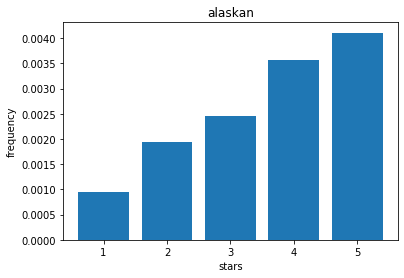

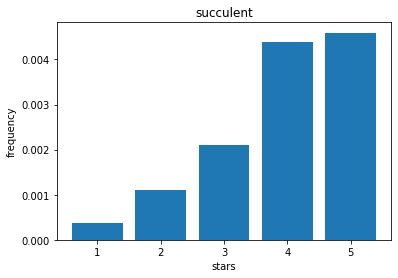

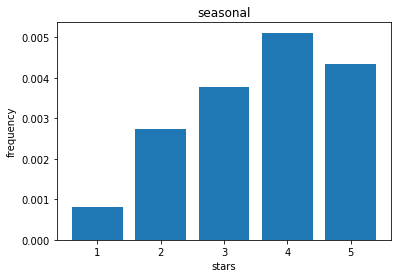

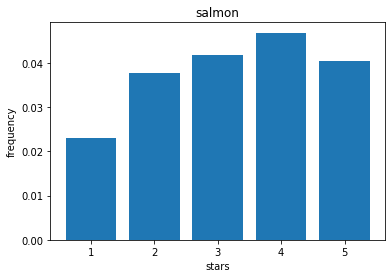

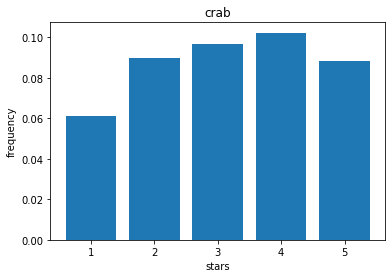

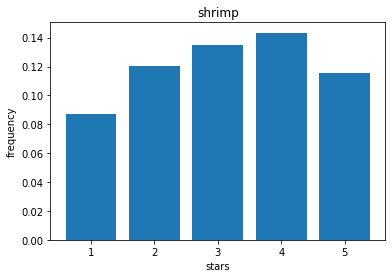

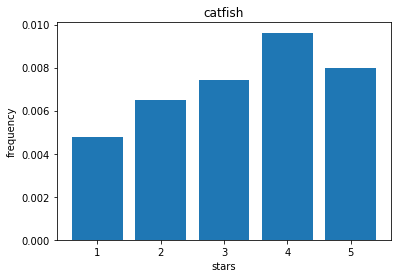

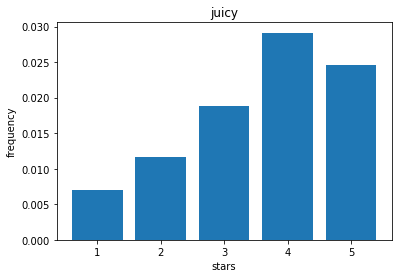

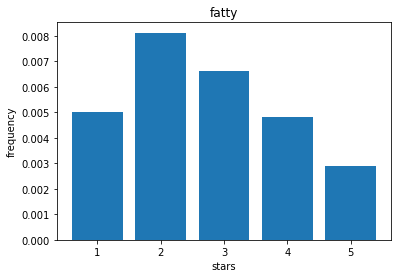

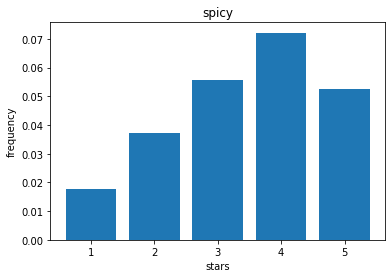

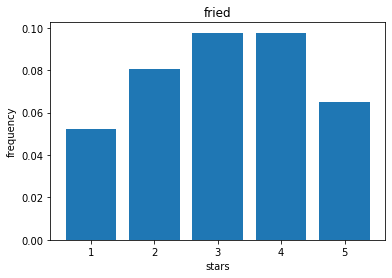

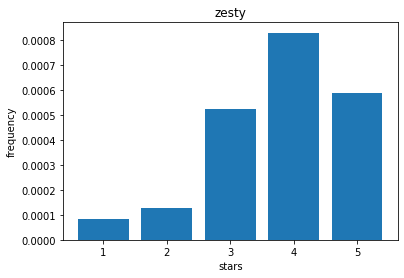

In [111]:
for word in word_food:
    plot_word(word,all_review)

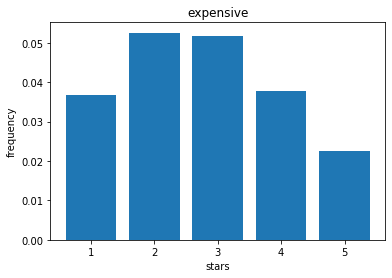

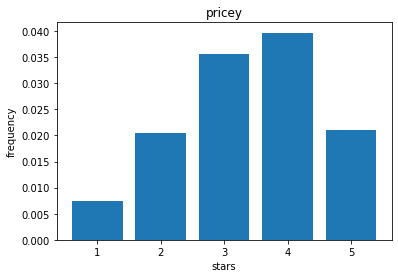

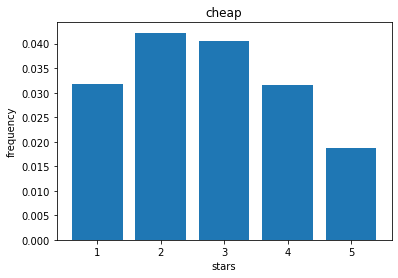

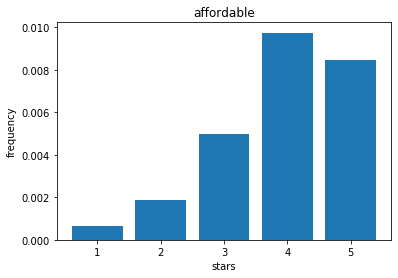

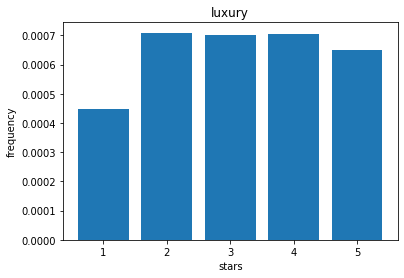

In [112]:
for word in word_price:
    plot_word(word,all_review)

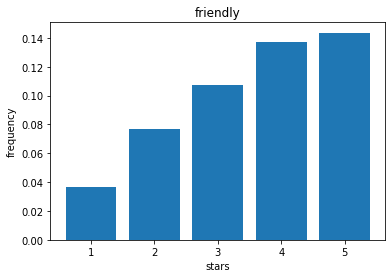

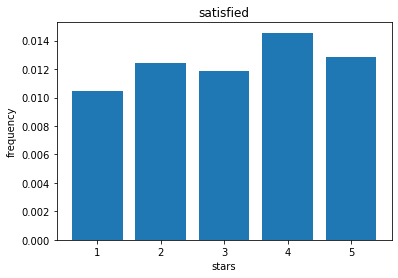

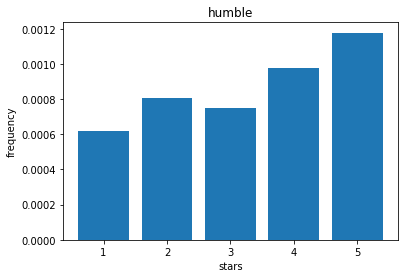

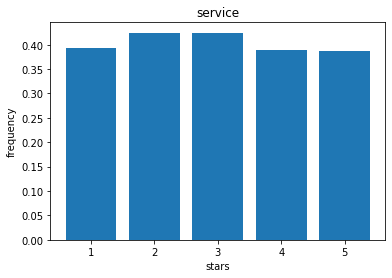

In [113]:
for word in word_service:
    plot_word(word,all_review)

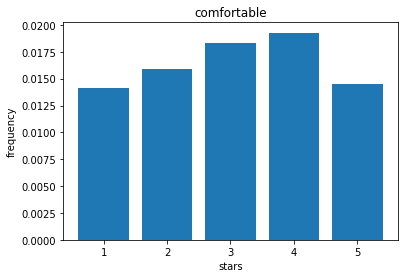

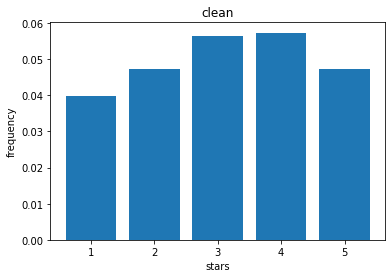

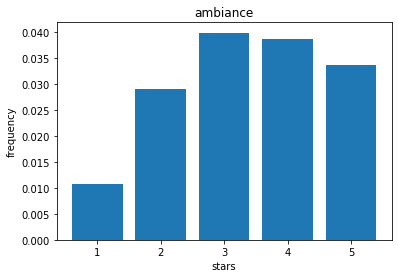

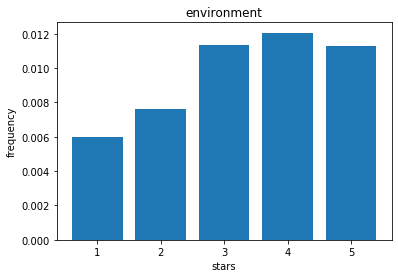

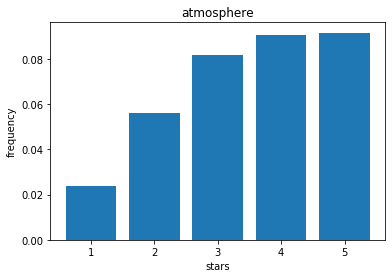

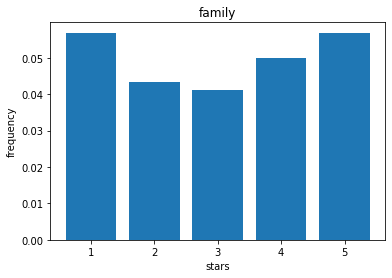

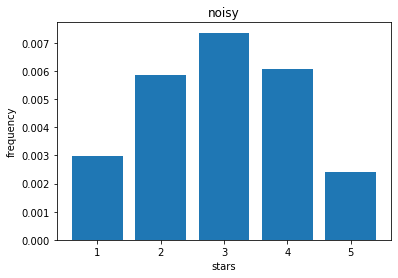

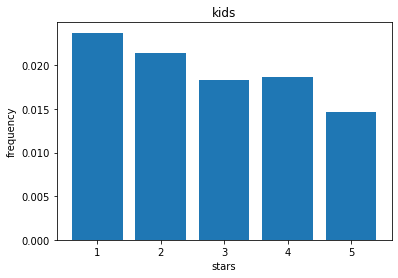

In [114]:
for word in word_environment:
    plot_word(word,all_review)

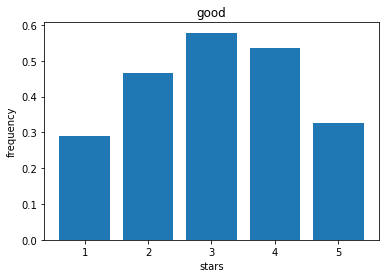

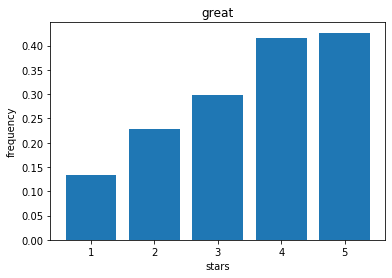

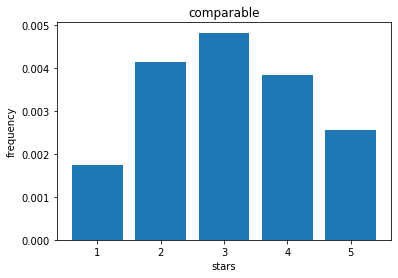

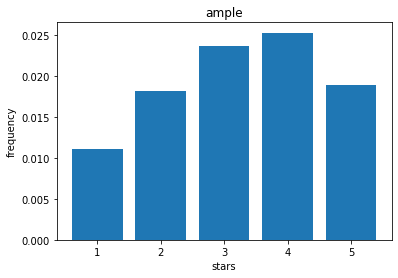

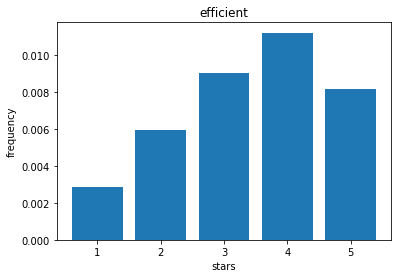

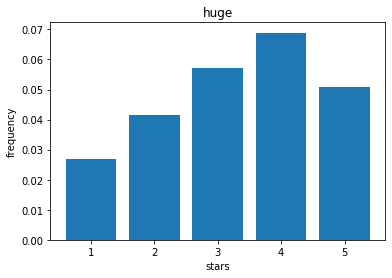

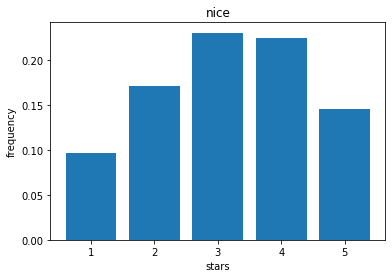

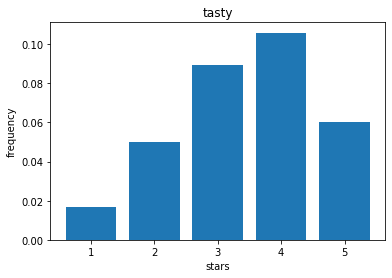

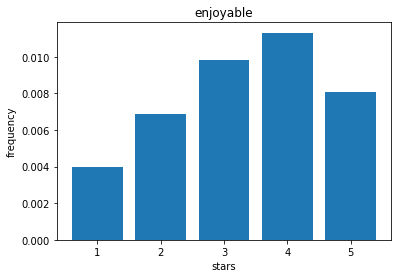

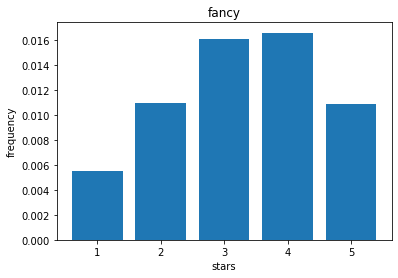

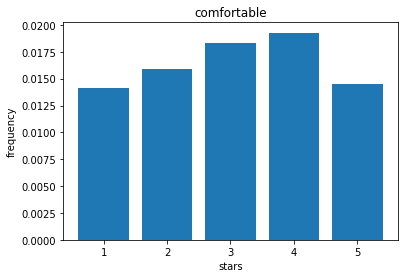

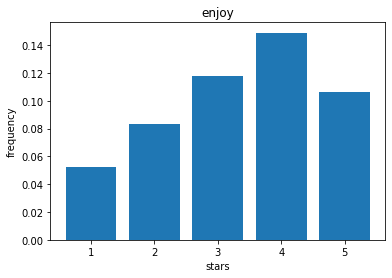

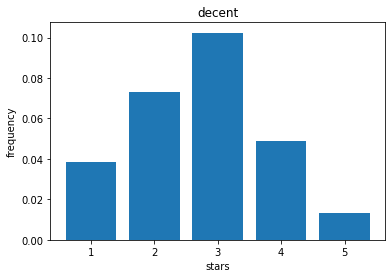

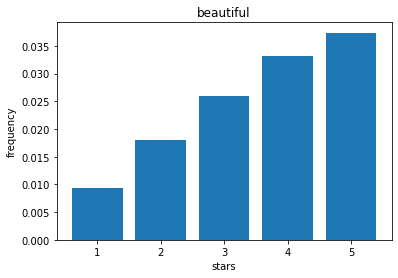

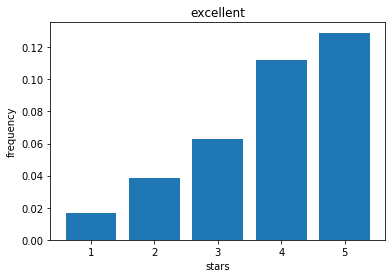

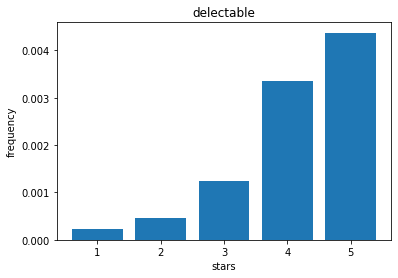

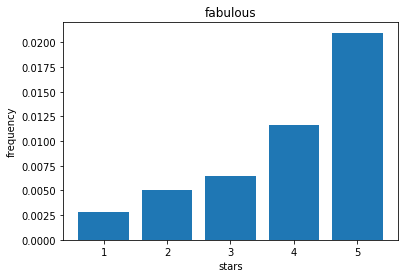

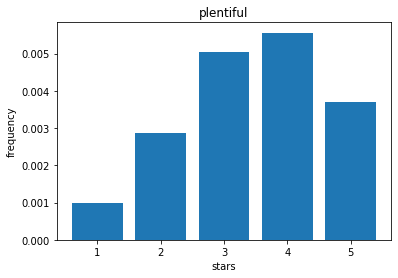

In [115]:
for word in word_positive:
    plot_word(word,all_review)

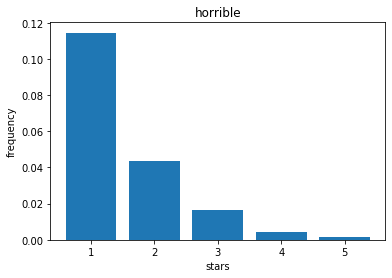

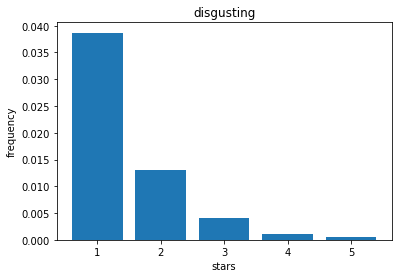

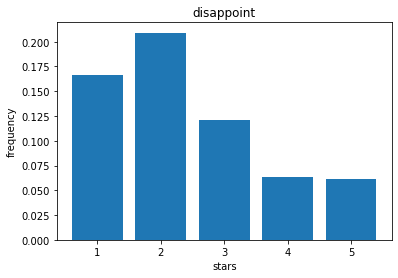

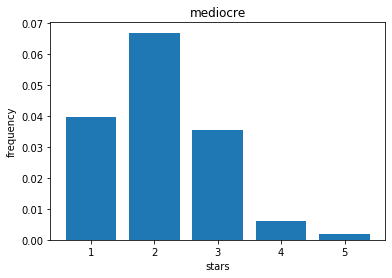

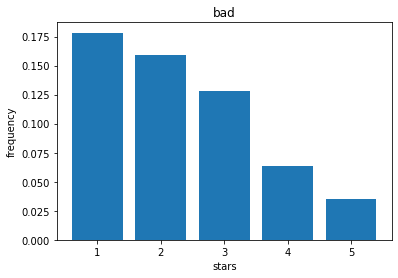

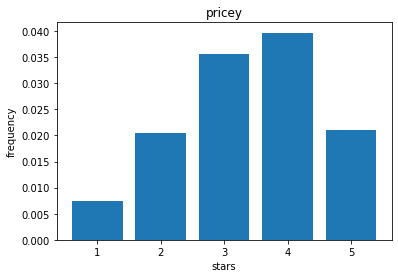

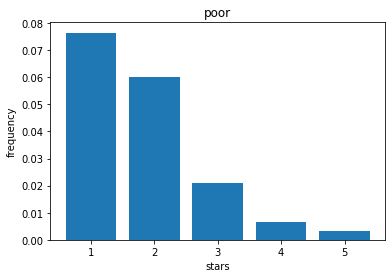

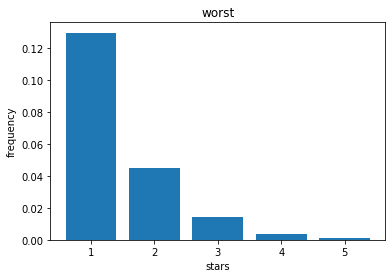

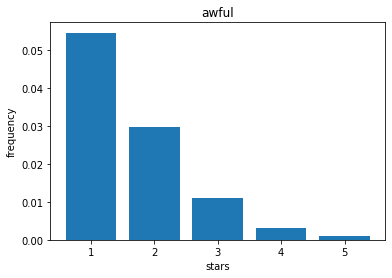

In [116]:
for word in word_negative:
    plot_word(word,all_review)

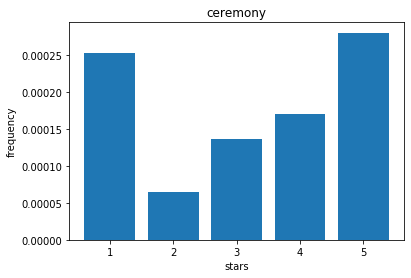

In [119]:
plot_word('ceremony',all_review)

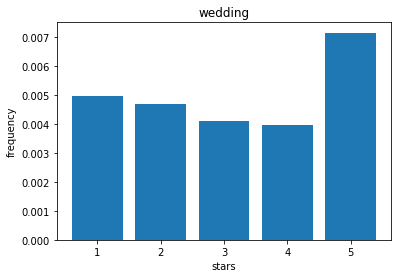

In [120]:
plot_word('wedding',all_review)

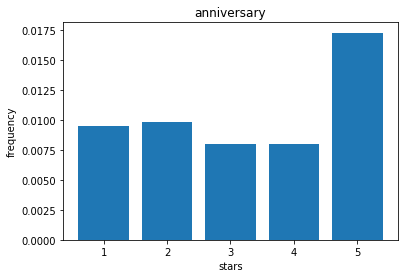

In [123]:
plot_word('anniversary',all_review)

In [141]:
all_review[2]

{'review_id': 'A1D2kUnZ0HTroFreAheNSg',
 'user_id': 'SuOLY03LW5ZcnynKhbTydA',
 'business_id': 'QXAEGFB4oINsVuTFxEYKFQ',
 'stars': 3.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': '***No automatic doors, not baby friendly!*** I frequent this Chinese restaurant before and post partum. Dim sum is ok, dishes at dinner time are huge, service is great, BUT there are no automatic doors! How am in supposed to push my stroller inside?!!!',
 'date': '2016-01-04 12:59:22'}

In [155]:
review_date=[]
for item in all_review:
    new_dict=copy.deepcopy(item)
    m=re.match(r'(.*)-(.*)-(.*)',new_dict['date'])
    new_dict['month']=m.group(2)
    review_date.append(new_dict)

In [161]:
month_review={}
for i in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    month_review[i]=[]
for item in review_date:
    month_review[item['month']].append(item)

In [174]:
month_num=[]
for i in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    month_num.append(len(month_review[i]))

In [190]:
for i in range(12):
    month_num[i]=month_num[i]/344964

In [191]:
month_num

[0.08354784847114481,
 0.0790343340174627,
 0.08740622209853782,
 0.08358843241613617,
 0.08637712920768544,
 0.08614232209737828,
 0.09715506545610557,
 0.09262995558956877,
 0.08231583585533563,
 0.08157372943263645,
 0.07216115304785427,
 0.0680679723101541]

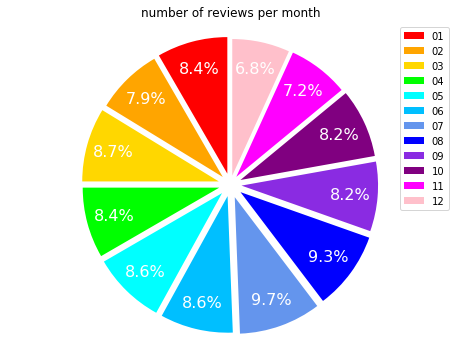

In [194]:
plt.figure(figsize=(8, 6))
labels=['01','02','03','04','05','06','07','08','09','10','11','12']
explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01)
colors=['red','orange','gold','lime','aqua','deepskyblue','cornflowerblue','blue','blueviolet','purple','magenta','pink']
plt.pie(month_total, labels=labels, explode=month_num,colors=colors,autopct='%1.1f%%', shadow=False, pctdistance=0.8,startangle=90, textprops={'fontsize': 16, 'color': 'w'})
plt.title('number of reviews per month')
plt.axis('equal')
plt.legend(loc='upper right')
plt.savefig('image/month_review.png', dpi=600)
None

In [169]:
def plot_word1(word,reviews):
    word_star={}
    for i in range(1,6):
        occurence=0
        for review in review_star[i]:
            if word in review['text'].lower():
                occurence+=1
        word_star[i]=occurence
    plt.bar(word_star.keys(),word_star.values())
    plt.xlabel("stars")
    plt.ylabel("frequency")
    plt.title(word)
    plt.show()

In [195]:
len(seafood_business)

2544

In [196]:
len(all_review)

344964

In [215]:
business_stars = {}

for item in seafood_business:
    if item['stars'] not in business_stars.keys():
        business_stars[item['stars']]=[]
        business_stars[item['stars']].append(item)
    else:
        business_stars[item['stars']].append(item)

In [216]:
business_stars

{2.5: [{'business_id': 'QXAEGFB4oINsVuTFxEYKFQ',
   'name': 'Emerald Chinese Restaurant',
   'address': '30 Eglinton Avenue W',
   'city': 'Mississauga',
   'state': 'ON',
   'postal_code': 'L5R 3E7',
   'latitude': 43.6054989743,
   'longitude': -79.652288909,
   'stars': 2.5,
   'review_count': 128,
   'is_open': 1,
   'attributes': {'RestaurantsReservations': 'True',
    'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
    'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
    'Caters': 'True',
    'NoiseLevel': "u'loud'",
    'RestaurantsTableService': 'True',
    'RestaurantsTakeOut': 'True',
    'RestaurantsPriceRange2': '2',
    'OutdoorSeating': 'False',
    'BikeParking': 'False',
    'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual':

In [206]:
seafood_business[4]

{'business_id': 'SZ5KO1KNiwtrktKo5mpuLA',
 'name': 'Empress Court',
 'address': '3570 Las Vegas Blvd',
 'city': 'Las Vegas',
 'state': 'NV',
 'postal_code': '89109',
 'latitude': 36.1161559,
 'longitude': -115.1750576,
 'stars': 3.5,
 'review_count': 21,
 'is_open': 0,
 'attributes': {'BusinessAcceptsCreditCards': 'True',
  'RestaurantsTakeOut': 'True',
  'RestaurantsAttire': "u'dressy'",
  'GoodForKids': 'True',
  'RestaurantsReservations': 'True',
  'RestaurantsPriceRange2': '3',
  'HasTV': 'False',
  'BikeParking': 'False',
  'Alcohol': "u'full_bar'",
  'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
  'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}",
  'OutdoorSeating': 'True',
  'RestaurantsGoodForGroups': 'True',
  'NoiseLevel': "u'quiet'",
  'RestaurantsDelivery': 'False'},
 'categories': 'Seafood

In [208]:
set(seafood_business[1]['attributes'].keys())

{'Alcohol',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'GoodForKids',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTakeOut'}

In [210]:
attributes=[]
for item in seafood_business:
    if item['attributes'] != None:
        attributes.extend(list(item['attributes'].keys()))

In [212]:
attributes=list(set(attributes))

In [217]:
attributes

['HappyHour',
 'RestaurantsDelivery',
 'Music',
 'WiFi',
 'GoodForKids',
 'Caters',
 'RestaurantsCounterService',
 'Alcohol',
 'BestNights',
 'BusinessAcceptsBitcoin',
 'DogsAllowed',
 'CoatCheck',
 'ByAppointmentOnly',
 'Corkage',
 'RestaurantsTakeOut',
 'RestaurantsGoodForGroups',
 'GoodForMeal',
 'Ambience',
 'RestaurantsTableService',
 'RestaurantsPriceRange2',
 'Open24Hours',
 'OutdoorSeating',
 'BusinessParking',
 'NoiseLevel',
 'DriveThru',
 'DietaryRestrictions',
 'HasTV',
 'BYOB',
 'RestaurantsAttire',
 'RestaurantsReservations',
 'BikeParking',
 'BYOBCorkage',
 'WheelchairAccessible',
 'GoodForDancing',
 'AgesAllowed',
 'Smoking',
 'BusinessAcceptsCreditCards']

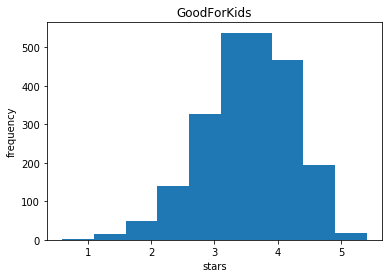

In [233]:
attr_GFK={}
for key in business_stars.keys():
    occurence=0
    for business in business_stars[key]:
        if business['attributes'] != None:
            if 'GoodForKids' in business['attributes'].keys():
                if business['attributes']['GoodForKids']=='True':
                    occurence=occurence+1
    attr_GFK[key]=occurence
plt.bar(attr_GFK.keys(),attr_GFK.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title('GoodForKids')
plt.savefig('image/GoodForKids.png')
plt.show()

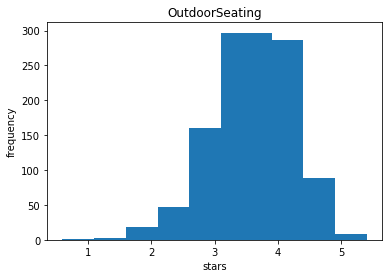

In [254]:
attr_out={}
for key in business_stars.keys():
    occurence=0
    for business in business_stars[key]:
        if business['attributes'] != None:
            if 'OutdoorSeating' in business['attributes'].keys():
                if business['attributes']['OutdoorSeating']=='True':
                    occurence=occurence+1
    attr_out[key]=occurence
plt.bar(attr_out.keys(),attr_out.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title('OutdoorSeating')
plt.savefig('image/OutdoorSeating.png')
plt.show()

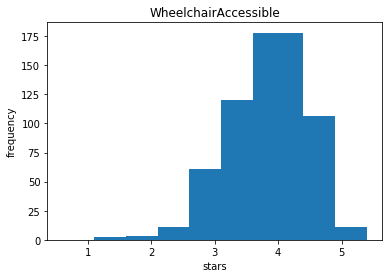

In [264]:
attr_wheel={}
for key in business_stars.keys():
    occurence=0
    for business in business_stars[key]:
        if business['attributes'] != None:
            if  'WheelchairAccessible' in business['attributes'].keys():
                if business['attributes'][ 'WheelchairAccessible']=='True':
                    occurence=occurence+1
    attr_wheel[key]=occurence
plt.bar(attr_wheel.keys(),attr_wheel.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title( 'WheelchairAccessible')
plt.savefig('image/ WheelchairAccessible.png')
plt.show()

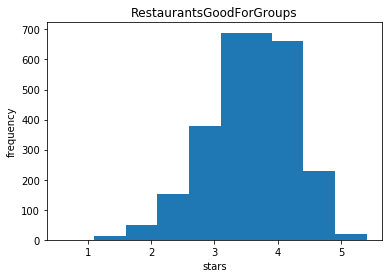

In [265]:
attr_group={}
for key in business_stars.keys():
    occurence=0
    for business in business_stars[key]:
        if business['attributes'] != None:
            if  'RestaurantsGoodForGroups' in business['attributes'].keys():
                if business['attributes'][ 'RestaurantsGoodForGroups']=='True':
                    occurence=occurence+1
    attr_group[key]=occurence
plt.bar(attr_group.keys(),attr_group.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title( 'RestaurantsGoodForGroups')
plt.savefig('image/RestaurantsGoodForGroups.png')
plt.show()

In [263]:
business_stars[5][5]['attributes']

{'GoodForKids': 'True',
 'RestaurantsTakeOut': 'True',
 'RestaurantsReservations': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsAttire': "'casual'",
 'RestaurantsDelivery': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsPriceRange2': '1',
 'NoiseLevel': "u'quiet'",
 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 'HasTV': 'True',
 'WiFi': "'free'",
 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}",
 'BikeParking': 'False',
 'OutdoorSeating': 'False',
 'RestaurantsTableService': 'True',
 'BusinessAcceptsBitcoin': 'False',
 'Caters': 'False',
 'WheelchairAccessible': 'True',
 'Alcohol': "u'beer_and_wine'",
 'DogsAllowed': 'False'}